In [2]:
# https://github.com/quantumlib/Cirq/tree/master/examples
# Import libraries
import random
import cirq

In [ ]:
def make_quantum_teleportation_circuit(ranX, ranY):
    """Returns a quantum teleportation circuit."""
    circuit = cirq.Circuit()
    msg, alice, bob = cirq.LineQubit.range(3)
    
    # Creates Bell state to shared between Alice and Bob
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])
    
    # Creates a random state for the Message
    circuit.append([cirq.X(msg)**ranX, cirq.Y(msg)**ranY])

    # Bell measurement of the Message and Alice's entangle qubit
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg)])
    circuit.append(cirq.measure(msg, alice))
    
    # Uses the two classical bits from the Bell measurement 
    # to recover the original quantum Message on Bob's entangled qubit
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])
    return msg, circuit

def main():
    # Encode a random state to teleport
    ranX = random.random()
    ranY = random.random()
    msg, circuit = make_quantum_teleportation_circuit(ranX, ranY)

    # Simulate the circuit
    sim = cirq.Simulator()
    message = sim.simulate(cirq.Circuit([cirq.X(msg)**ranX, cirq.Y(msg)**ranY]))

    # Print the Block Sphere of Alice's qubit
    print("Bloch Sphere of Alice's qubit:")
    b0X, b0Y, b0Z = cirq.bloch_vector_from_state_vector(message.final_state_vector, 0)
    print("x: ", round(b0X, 4), "y: ", round(b0Y, 4), "z: ", round(b0Z, 4))

    print("\nCircuit:")
    print(circuit)

    # Record the final state of the simulation
    final_results = sim.simulate(circuit)

    print("\nBloch Sphere of Bob's qubit:")
    b2X, b2Y, b2Z = cirq.bloch_vector_from_state_vector(final_results.final_state_vector,2)
    print("x: ", round(b2X, 4), "y: ", round(b2Y, 4), "z: ", round(b2Z, 4))

In [11]:
main()

Bloch Sphere of Alice's qubit:
x:  -0.3077 y:  -0.6778 z:  -0.6677

Circuit:
0: ───X^0.763───Y^0.137───@───H───M───────@───
                          │       │       │
1: ───H─────────@─────────X───────M───@───┼───
                │                     │   │
2: ─────────────X─────────────────────X───@───

Bloch Sphere of Bob's qubit:
x:  -0.3077 y:  -0.6778 z:  -0.6677


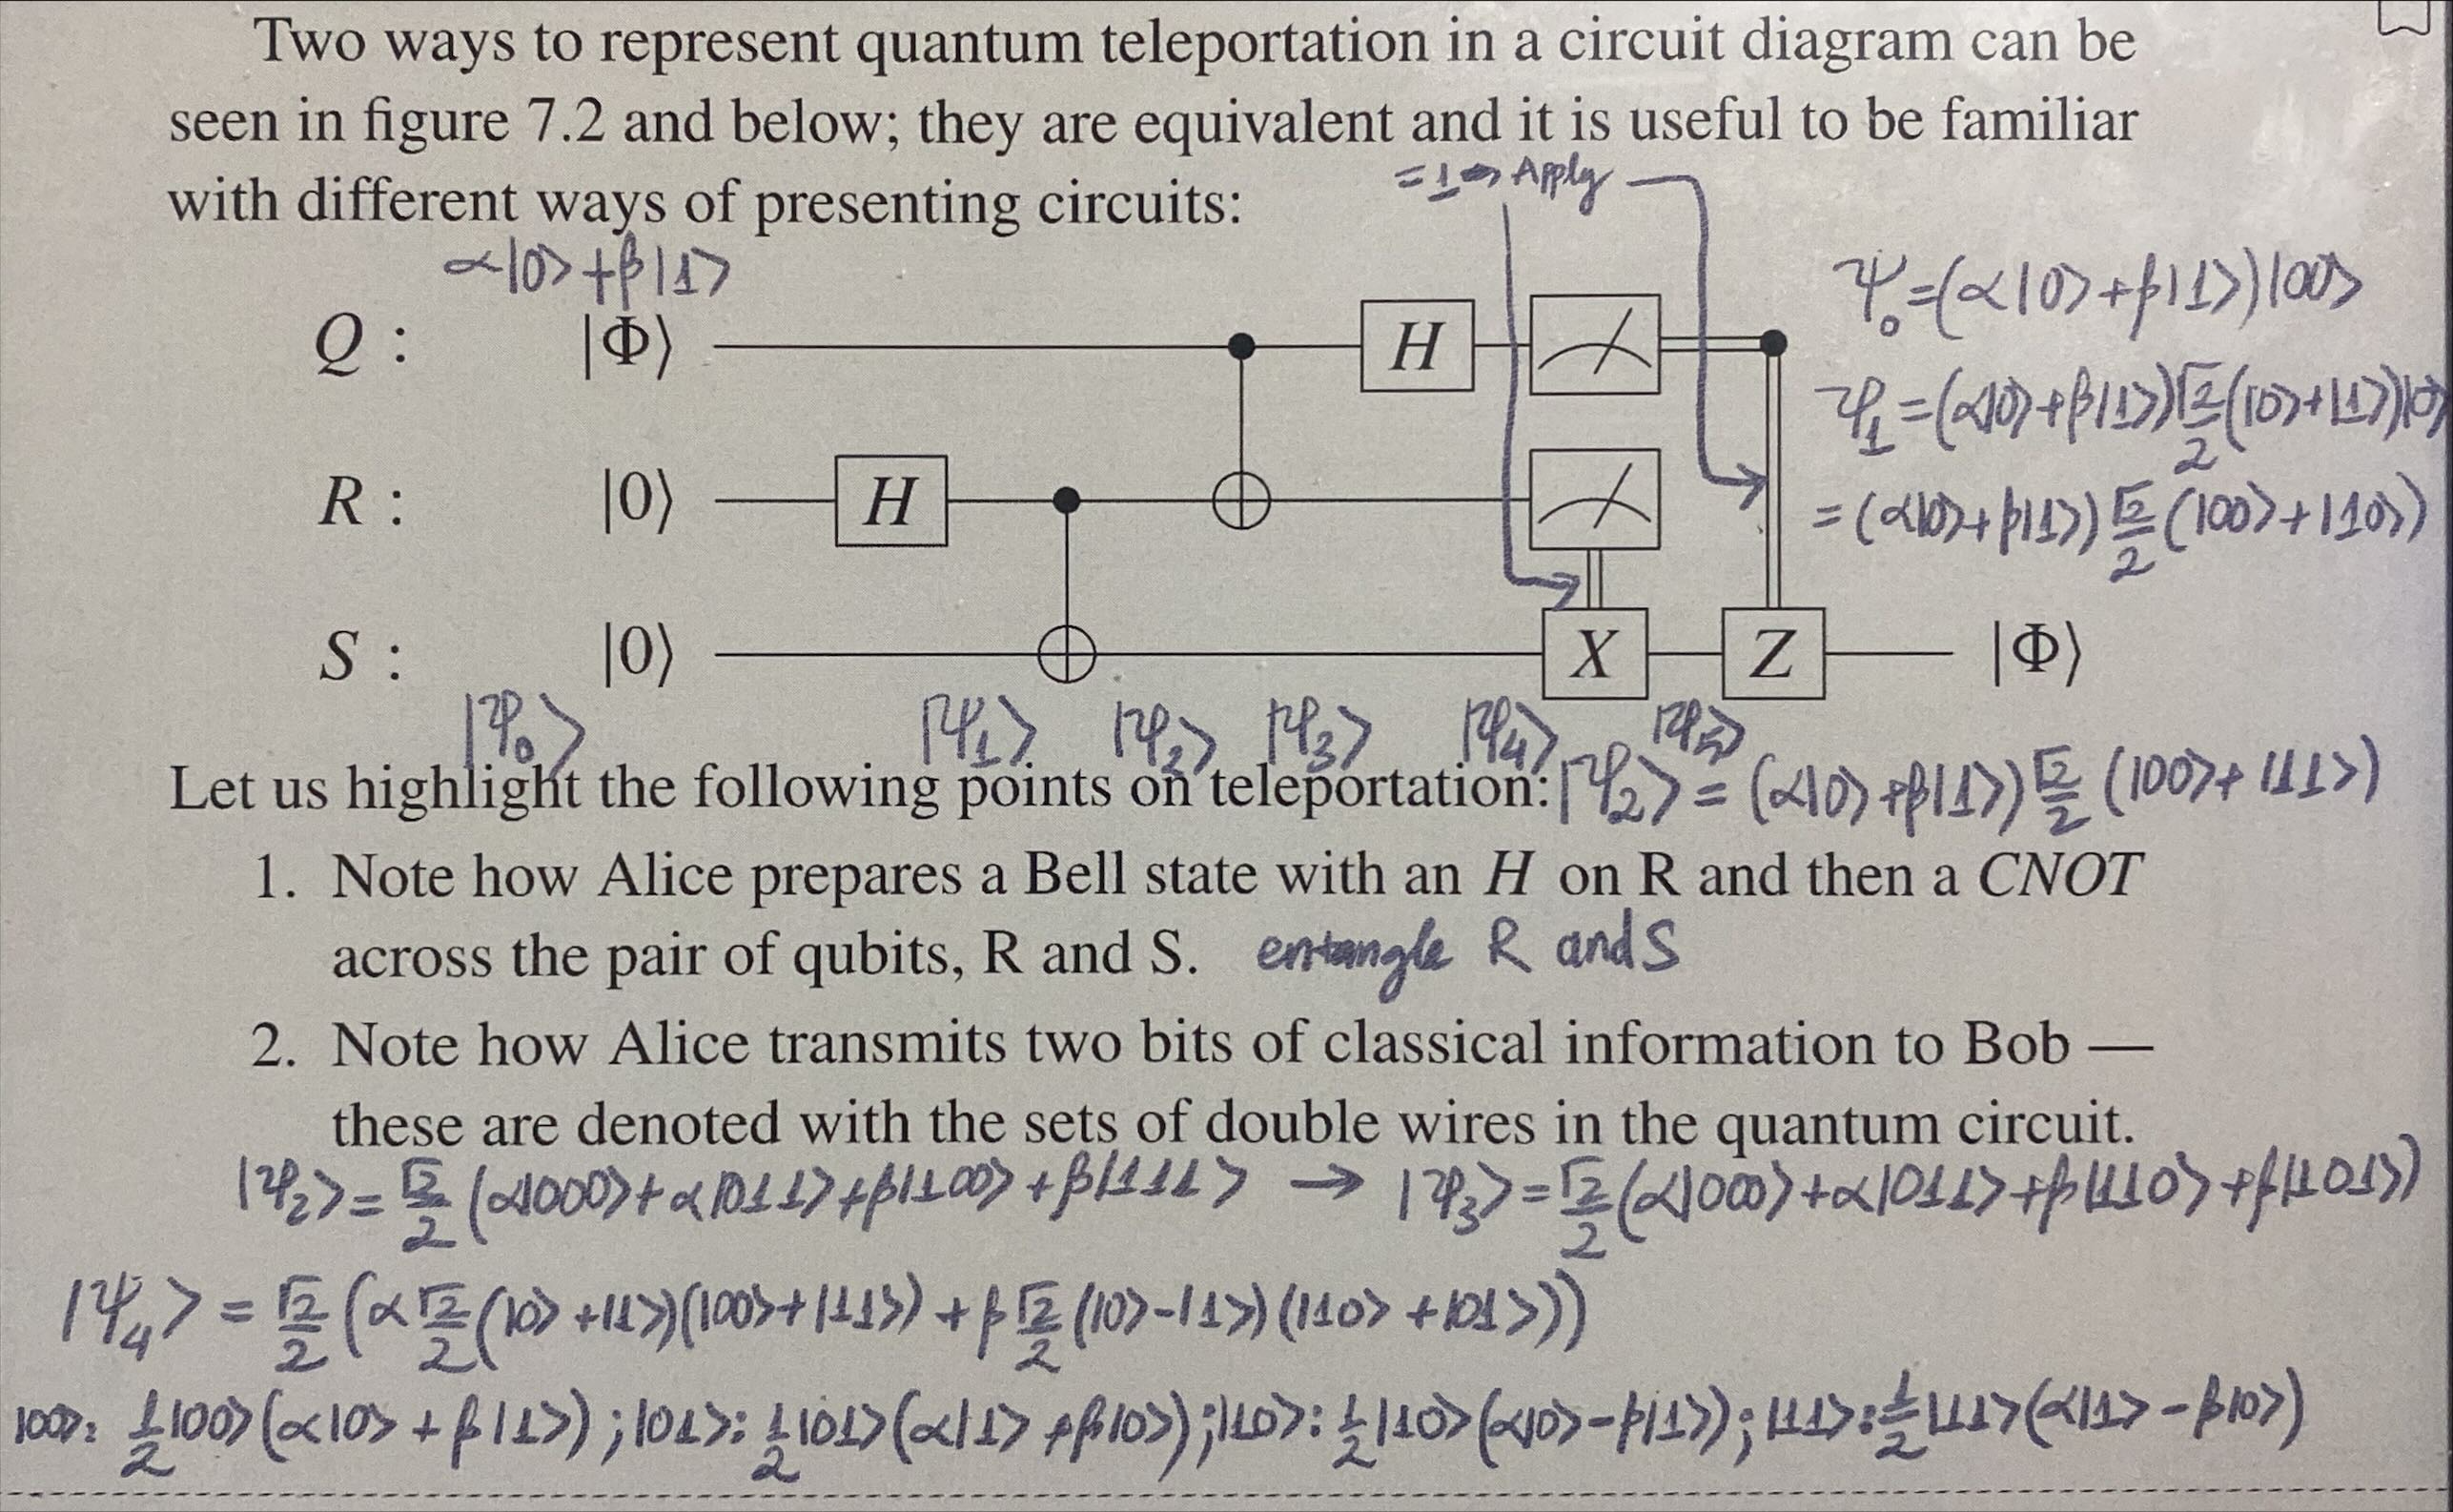

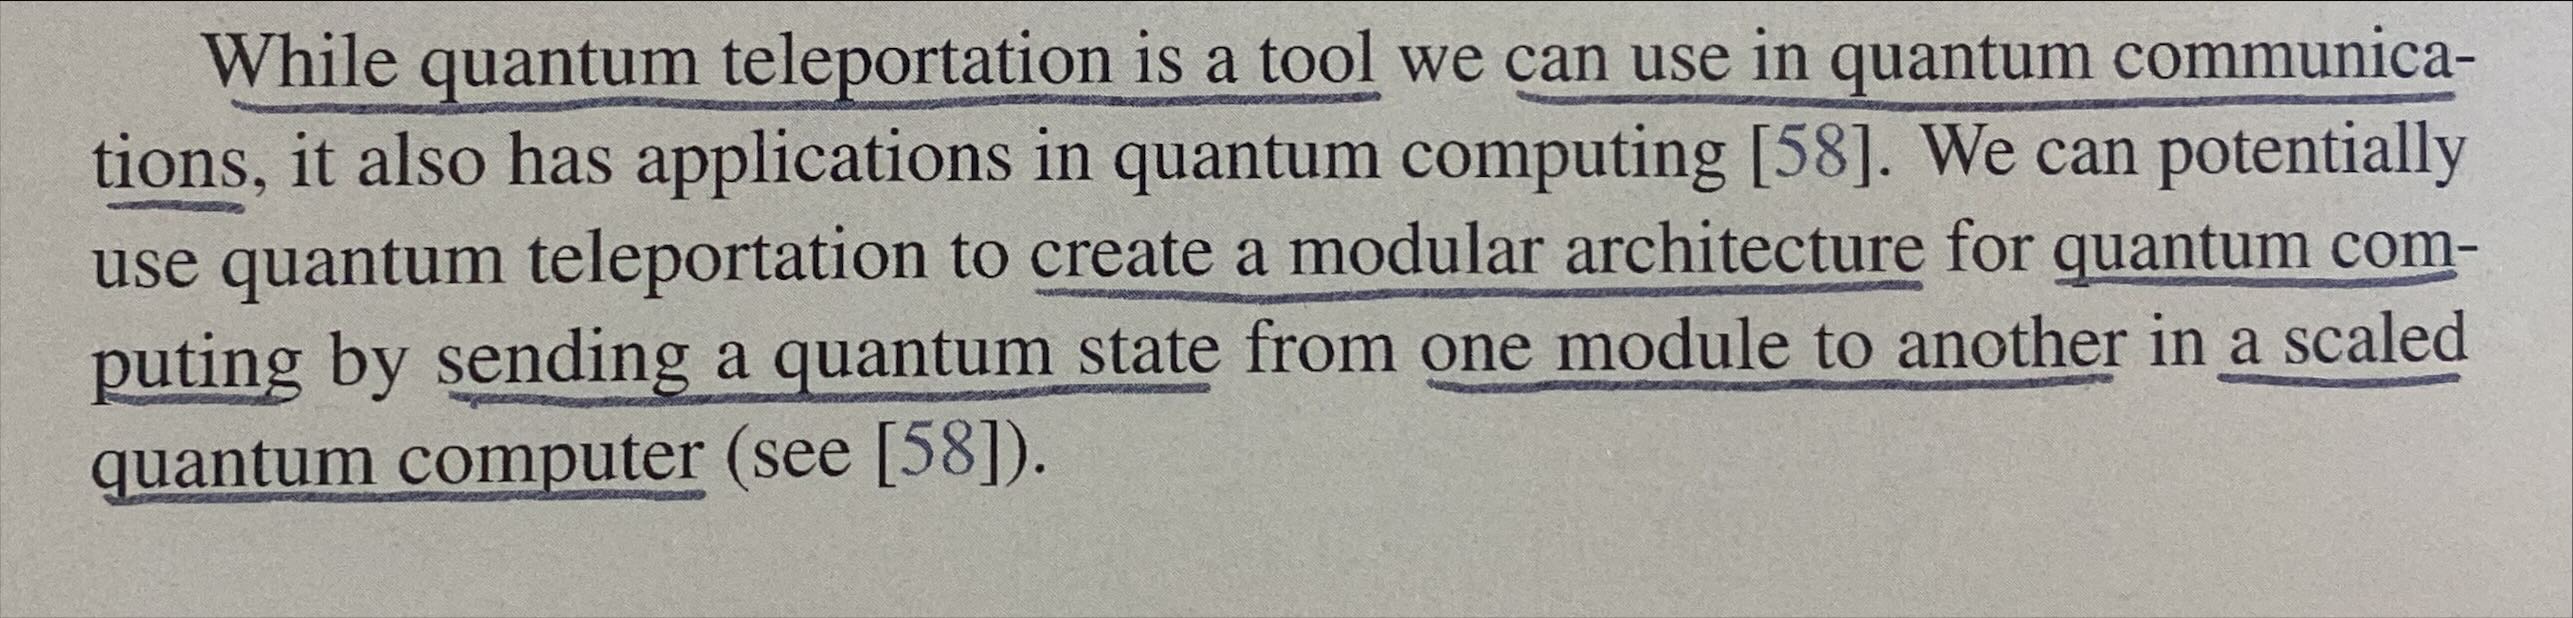